In [121]:
# Importing the libraries
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import pickle
import os
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

In [122]:
pip install numpy pandas seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns
pd.set_option("display.max_columns", None)

# Set seaborn style (modern way)
sns.set_theme(style="whitegrid")

# Set font weights and sizes
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15


In [124]:
SPLIT_METHOD = 'time'  # 'time' or 'random'
DATA_PATH = r"C:\Users\User\OneDrive\Desktop\INFOSYS\Data\day.csv"
OUTPUT_DIR = "."
df = pd.read_csv(DATA_PATH)

## Data Inspection 

In [125]:
# Check Total rows and Columns in dataset.
print(f' The shape of dataset is {(df.shape)} \n Total Rows are : {(df.shape)[0]}\n Total Columns are : {(df.shape)[1]}')

 The shape of dataset is (731, 16) 
 Total Rows are : 731
 Total Columns are : 16


In [126]:
required_cols = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
                 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

missing_required = [c for c in required_cols if c not in df.columns]
if missing_required:
    print("Warning: expected columns missing in dataset:", missing_required)
else:
    print("All expected columns present.")

All expected columns present.


In [127]:
# Check 1st Five rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [128]:
# Check last 5 rows
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [129]:
# Check the info of dataset to know the data types of columns or variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [130]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [131]:
df.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### Obeservations

In [132]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [133]:
# Check for duplicates
duplicates = df.duplicated().sum()
if duplicates > 0:
        print(f"Found {duplicates} duplicate rows. Removing them.")
        df = df.drop_duplicates()
else:
        print("No duplicate rows found.")

No duplicate rows found.


In [134]:
# Check for missing values
missing_values = df.isnull().sum().sum()
if missing_values > 0:
    print(f"Found {missing_values} missing values. Handling them.")
    df = df.dropna()  # Drop rows with any missing values
else:
    print("No missing values found.")

No missing values found.


In [135]:
#Get distinct categories counts forSeasons categories
df['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [136]:
#Get distinct categories counts for Holiday categories
df['holiday'].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [137]:
df['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [138]:
df['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64

In [139]:
#Get distinct categories counts for for Month categories
df['mnth'].value_counts()

mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     57
Name: count, dtype: int64

## Data Cleaning

In [140]:
# Convert dteday to datetime (format is DD-MM-YYYY)
#df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')
#print("Converted dteday to datetime format")
    

In [141]:
#1. Drop unnecessary columns - to prevent leakage
#Drop the original datetime column as it can't be used directly in ML models
df = df.drop('dteday', axis=1)
print("Dropped original dteday column")

Dropped original dteday column


In [142]:
df = df.drop('atemp', axis=1)
print("Dropped 'atemp' column.")

Dropped 'atemp' column.


In [143]:
columns_to_drop = ['instant', 'casual', 'registered']
df = df.drop(columns=columns_to_drop)
print(f"Dropped columns that leak target or are irrelevant: {columns_to_drop}")

Dropped columns that leak target or are irrelevant: ['instant', 'casual', 'registered']


In [144]:
# Inspect after drops
print("\nAfter dropping leakage columns, shape:", df.shape)
display(df.head())


After dropping leakage columns, shape: (731, 11)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [145]:
# Handle missing values (simple strategy)
print("\nMissing values after datetime parsing and drops:")
print(df.isna().sum())


Missing values after datetime parsing and drops:
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64


In [146]:
#2. Create new relevant features
# Create is_weekend feature (1 if weekend, 0 otherwise), Weekend is when weekday is 0 (Saturday) or 6 (Sunday)

df['weekend'] = ((df['weekday'] == 0) | (df['weekday'] == 6)).astype(int)
print("Created is_weekend feature (1 for weekend, 0 for weekday)")

Created is_weekend feature (1 for weekend, 0 for weekday)


In [147]:
#Get distinct categories counts for for weekend categories
df['weekend'].value_counts()

weekend
0    521
1    210
Name: count, dtype: int64

In [148]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
predictor_numeric = [c for c in numeric_cols if c != 'cnt']
if df[predictor_numeric].isna().sum().sum() > 0:
    for col in predictor_numeric:
        if df[col].isna().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)

In [149]:
# 3. Decide categorical vs numeric features
# Candidate categorical columns commonly in 'day' dataset:


candidate_cat = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit',
                 'year', 'mnth', 'is_weekend']
#Filter valid categorical columns from dataframe
categorical_cols = [c for c in candidate_cat if c in df.columns and df[c].dtype != 'float64']

#Verify categorical nature based on unique values
categorical_cols = [c for c in categorical_cols if df[c].nunique() <= 20]

# Numeric features: all numeric predictors excluding target and categorical cols
numeric_features = [c for c in predictor_numeric if c not in categorical_cols]

print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_features)


Categorical columns: ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit', 'mnth']
Numeric columns: ['temp', 'hum', 'windspeed', 'weekend']


In [150]:
## Check the Summary of Bike data to egt mean,max,25%,50%,75% etc
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,weekend
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,4504.348837,0.287278
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,1937.211452,0.452802
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,22.000000,0.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,3152.000000,0.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,4548.000000,0.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,5956.000000,1.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,8714.000000,1.000000


## Exploratory Data Analysis

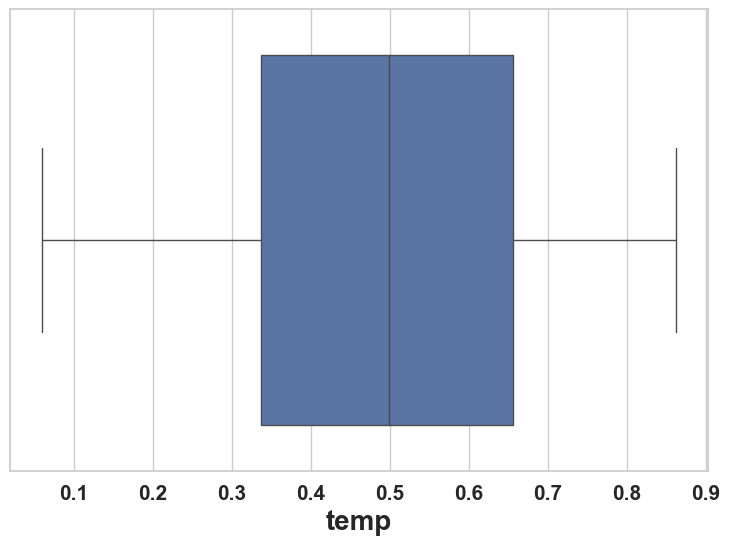

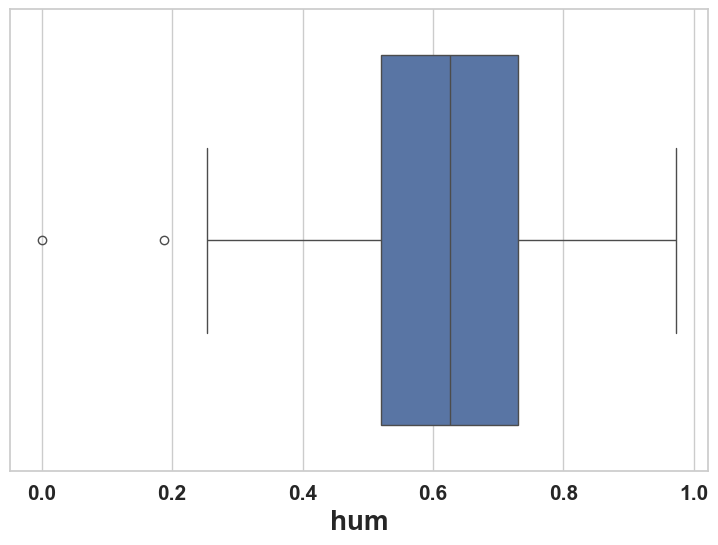

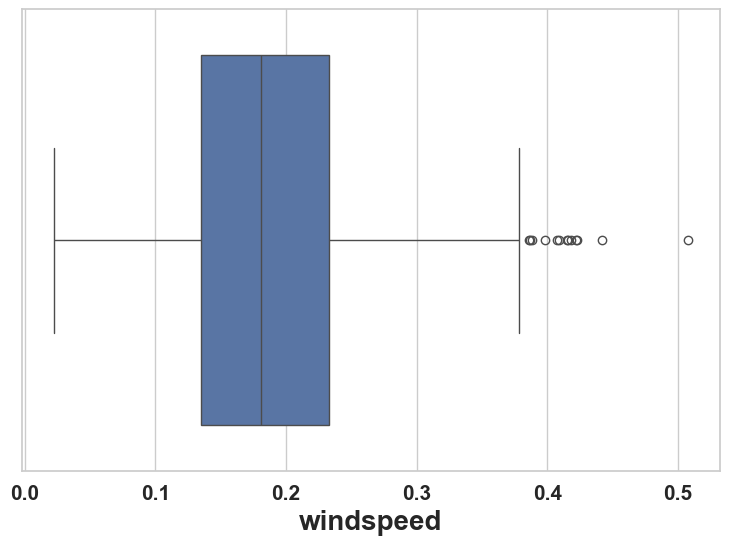

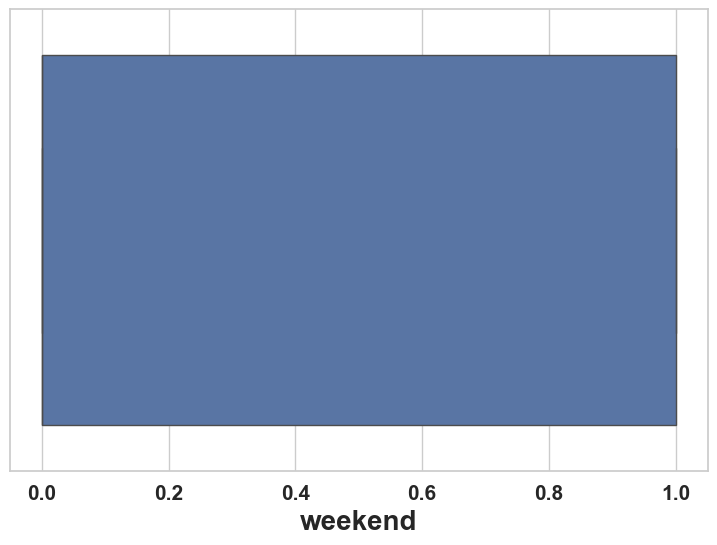

In [151]:
# plotting box plot of numeric columns to check oultliers
for col in numeric_features:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  sns.boxplot(x = df[col])

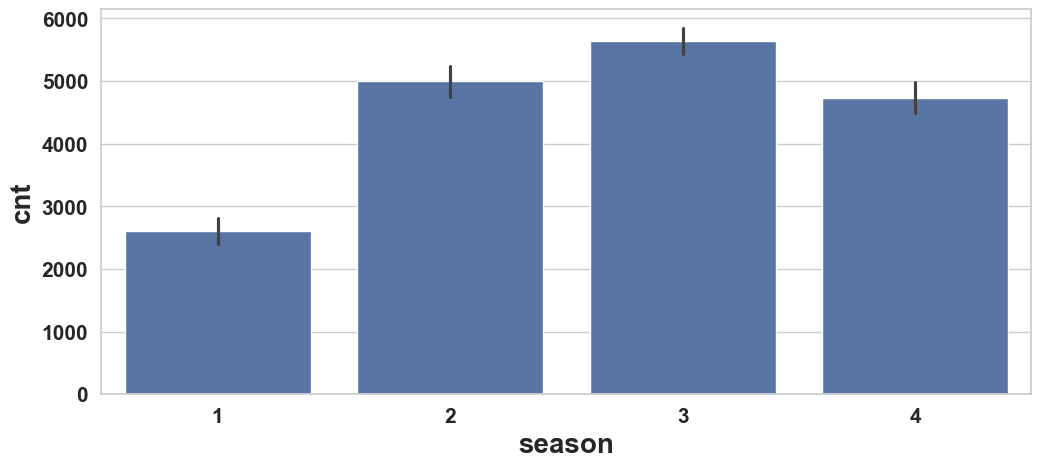

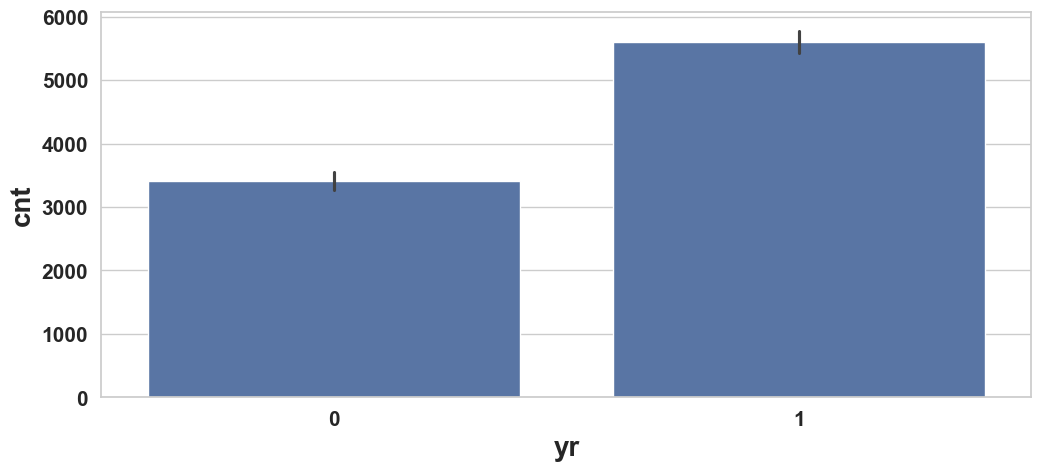

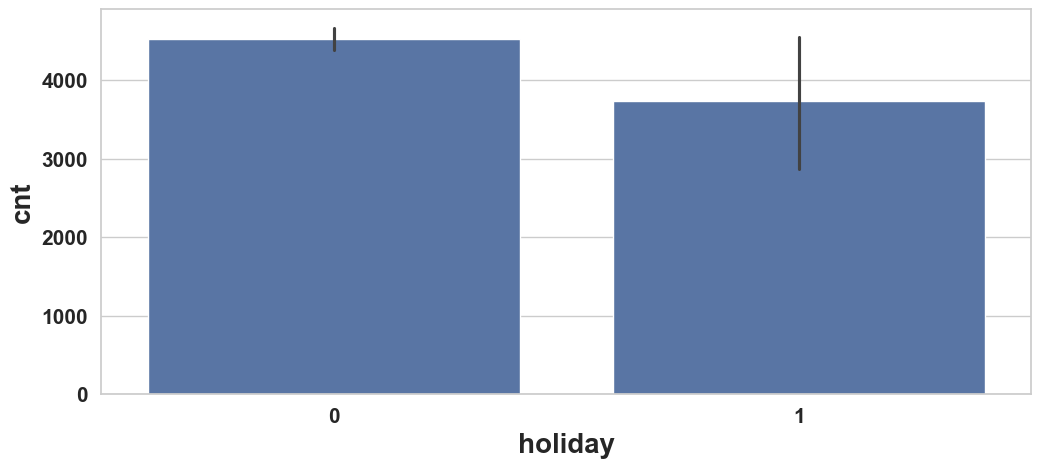

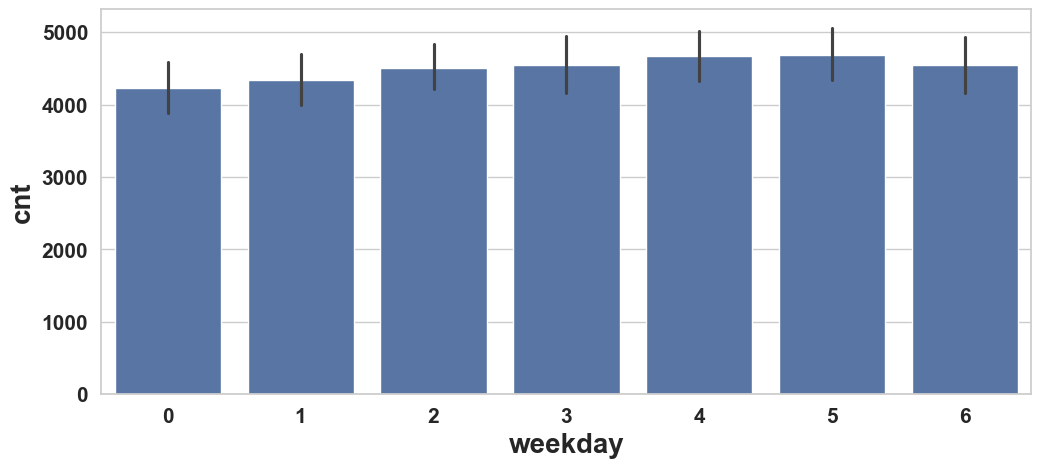

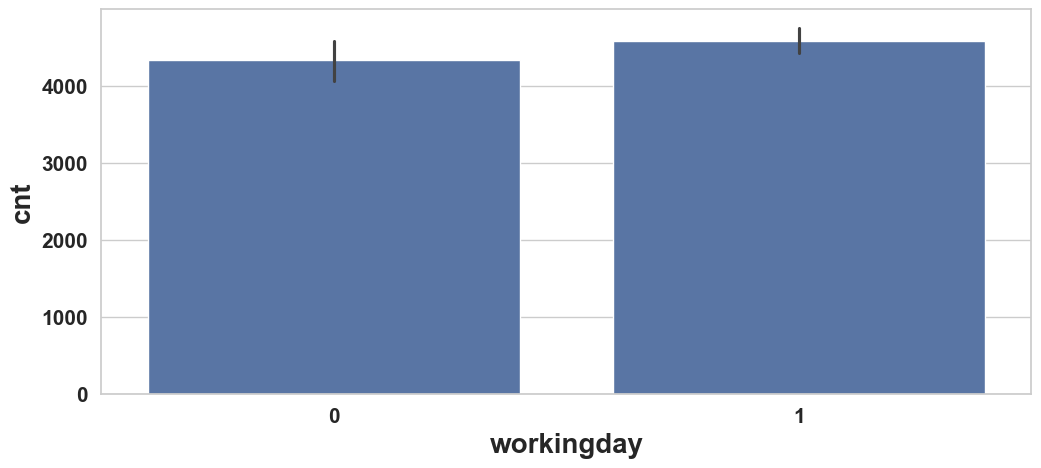

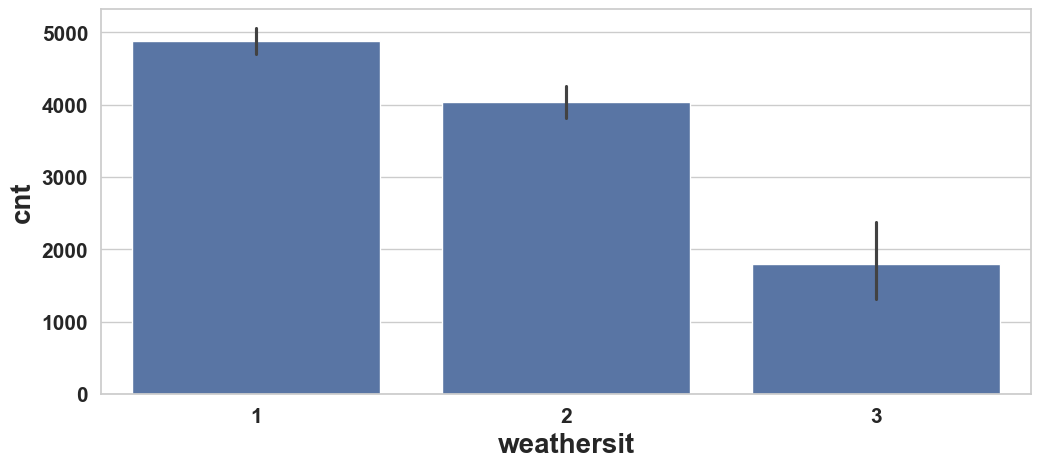

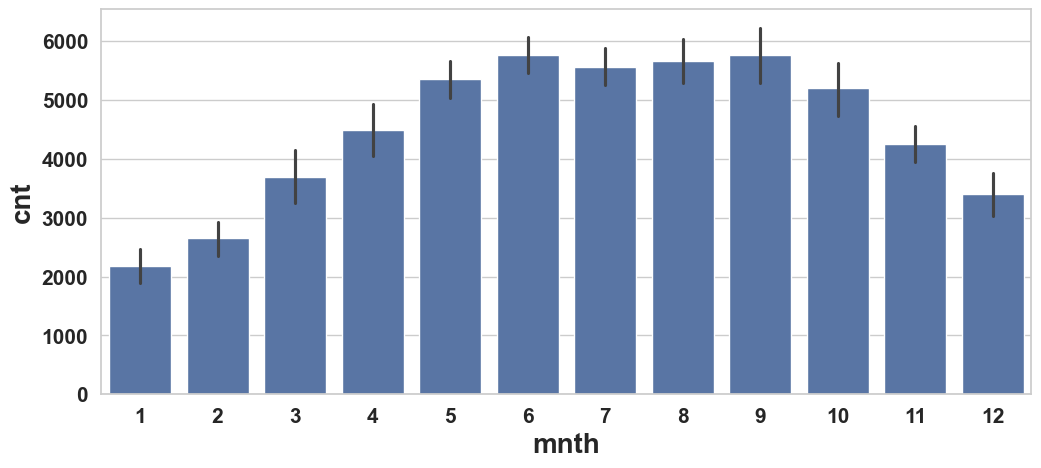

In [152]:
# plot barchart plot for each categorical columns with respect to target variable to get insights
for col in categorical_cols:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.barplot(x = df[col],y = df['cnt'])

### Bike Rental Trends by Season
Highest Demand is observed in Season 3 (Fall). Lowest Demand is in Season 1 (Spring), having the lowest count. Intermediate demand levels are seen in Season 2 (Summer) and Season 4 (Winter)

### Bike Rental Trends by year

The number of bike rentals increased substantially from Year 0 to Year 1, suggesting that the service grew in popularity or expanded its operations during that period.

### Bike rental Trends by Holiday

Average bike sharing demand is higher on non-holiday days (0)


### Bike rental Trends by WeekDay vs weekend

The average bike sharing demand is highly consistent throughout the week.
Weekdays (0) and Weekends (1) both show an average demand count of slightly over 4,500.The difference in demand between weekdays and weekends is negligible and not statistically significant.

### Bike rental Trends by WeekDay

Bike sharing demand is high and stable throughout the week, peaking slightly on Friday (5). The lowest demand is on Sunday (0)

### Bike rental Trends by Workingday

The bike sharing system shows consistently high demand across the week. Demand is slightly higher on working days (1)  than on non-working days (0)


### Bike Rental Trends by Weather Condition

bike demand decreases significantly as the weather conditions move from Category 1 (Clear) to Category 3 (Light Rain/Snow).

### Bike Rental Trends by Month

Bike sharing demand follows a strong annual cycle, rising from a minimum in winter/early spring to a peak in summer/fall.

Peak Demand occurs between June (6) and September (9), with the highest average count near 5,800.

Lowest Demand is observed in January (1) and February (2), with counts around 2,100 to 2,600.

There is a sharp decline in demand after October, indicating the impact of colder weather.

## Dependent variable (Bike count) Vs Categorical columns

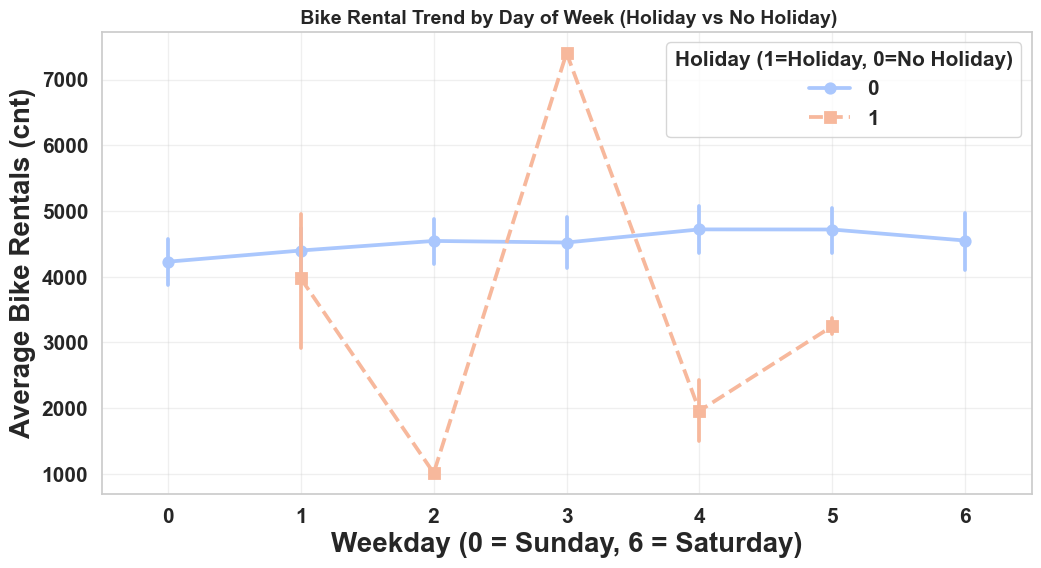

In [153]:
plt.figure(figsize=(12,6))
sns.pointplot(
    data=df,
    x="weekday",
    y="cnt",
    hue="holiday",
    palette="coolwarm",
    markers=["o", "s"],
    linestyles=["-", "--"]
)
plt.title(" Bike Rental Trend by Day of Week (Holiday vs No Holiday)", fontsize=14)
plt.xlabel("Weekday (0 = Sunday, 6 = Saturday)")
plt.ylabel("Average Bike Rentals (cnt)")
plt.legend(title="Holiday (1=Holiday, 0=No Holiday)")
plt.grid(True, alpha=0.3)
plt.show()

### Observation

1. On non holidays (including weekends- regular holidays), the average number of bike rentals remains relatively stable throughout the week.
There is slight increase during the middle of the week (Tuesday to Friday).

2. On holidays, There is a massive peak in bike rentals on Wednesday (weekday = 3), the lowest number of holiday rentals occurs on Tuesday (weekday = 2)

3. The average bike rentals on holidays are generally lower than non-holidays, except for the significant peak on Wednesday.


Text(0.5, 1.0, 'Bike Rental Trend according to day on working day ')

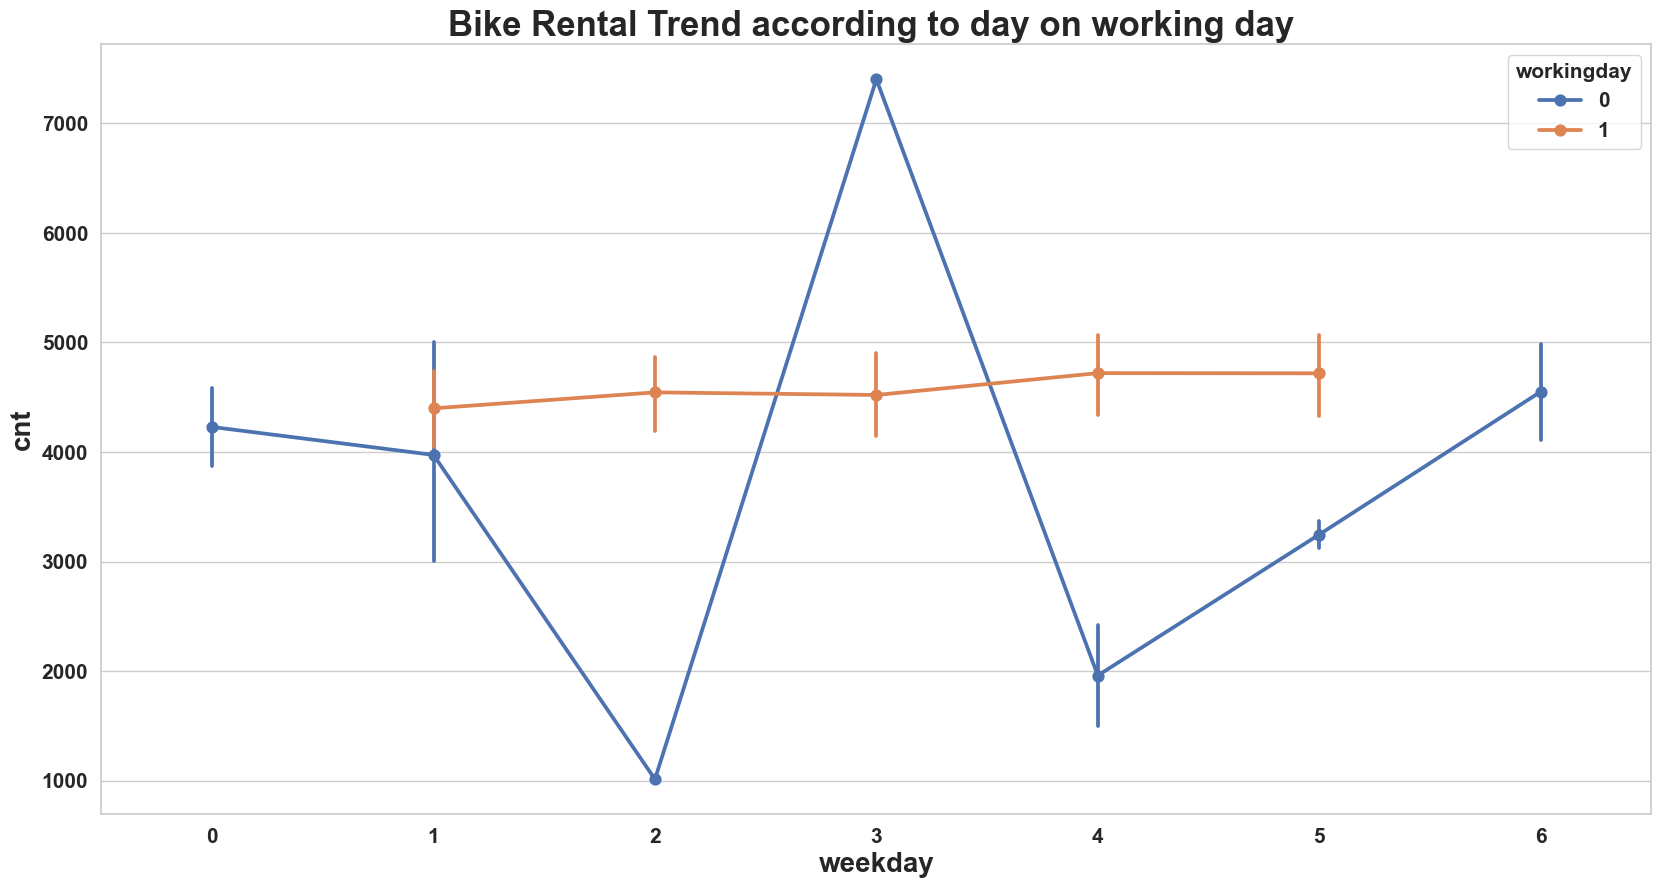

In [154]:
# Bike Rental trend with respect to day on working day.
plt.figure(figsize=(20,10))
sns.pointplot(x = df['weekday'],y = df['cnt'],hue = df['workingday'])
plt.title("Bike Rental Trend according to day on working day ")

1. Working Day(1) Demand is Stable and highly consistent across the week. 

2. Non-Working Day (0) shows extreme volatility, with a peak on Day 3  and an unexplained trough on Day 2.

3. Weekend Demand is Moderate.

Text(0.5, 1.0, 'Bike Rental Trend according to season on month')

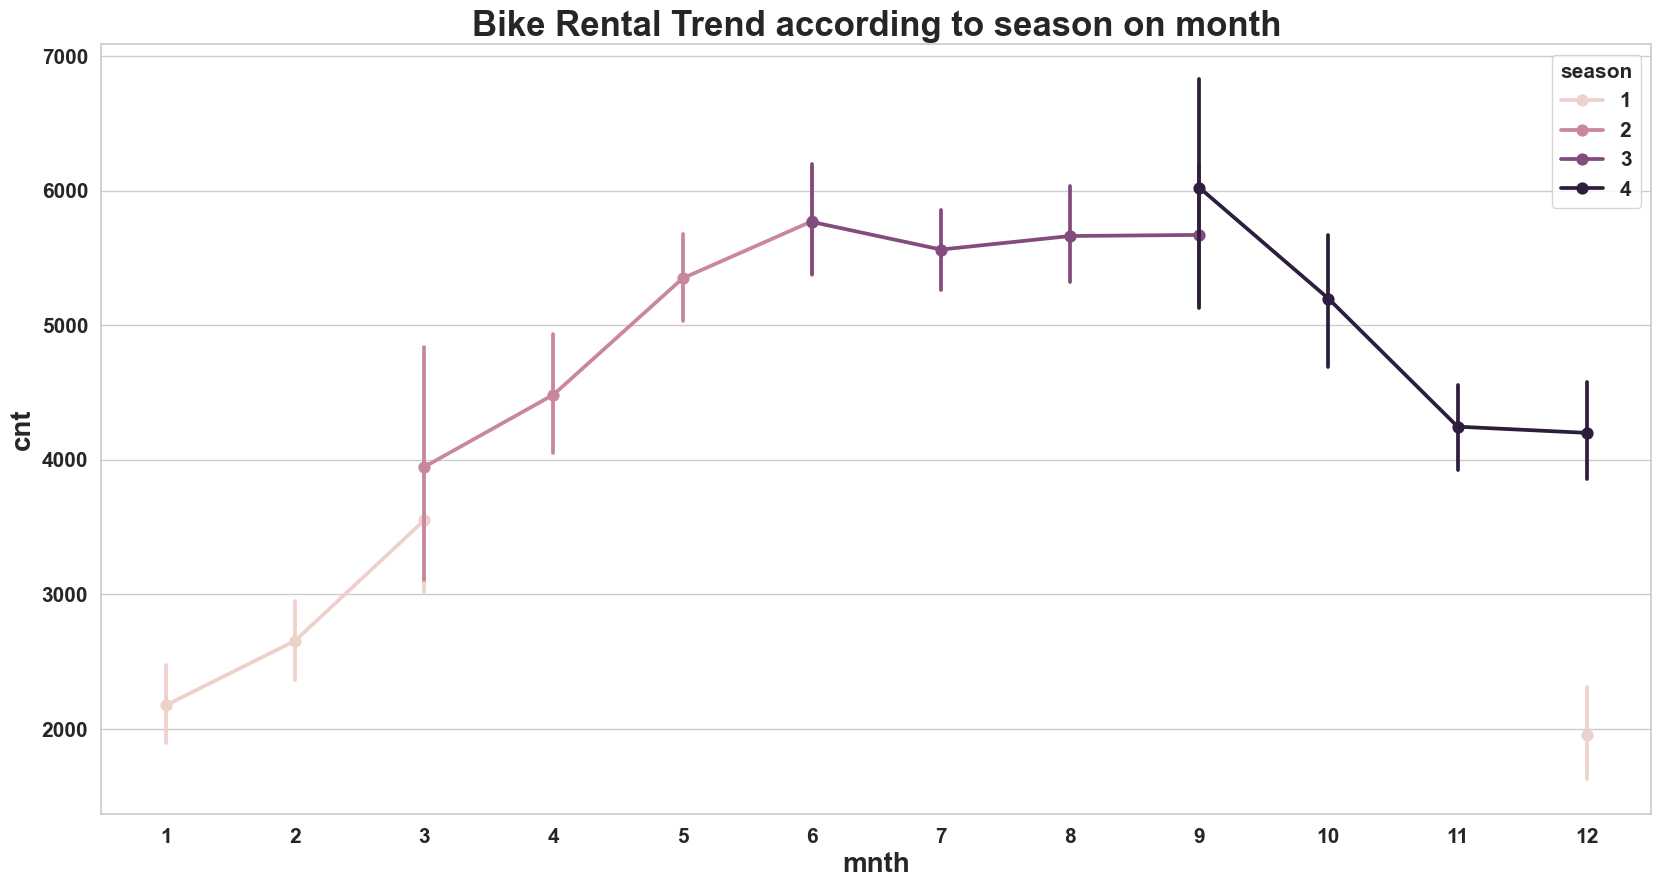

In [155]:
# Bike Rental trend with respect to months on Seasons.
plt.figure(figsize=(20,10))
sns.pointplot(x = df['mnth'],y = df['cnt'],hue = df['season'])
plt.title("Bike Rental Trend according to season on month")

Bike rental demand follows a predictable annual pattern: 
1. It is lowest in Winter (Season 4 and early Season 1), 
2. Rises sharply through Spring (Season 1), 
3. Reaches its most stable and highest level during Summer (Season 2) and Fall (Season 3).
4. drops steeply in late Winter (Season 4). 

The overall annual peak occurs in September (9), and the lowest point is in December (12) and January (1).

Text(0.5, 1.0, 'Bike Rental Trend according to season on weekday')

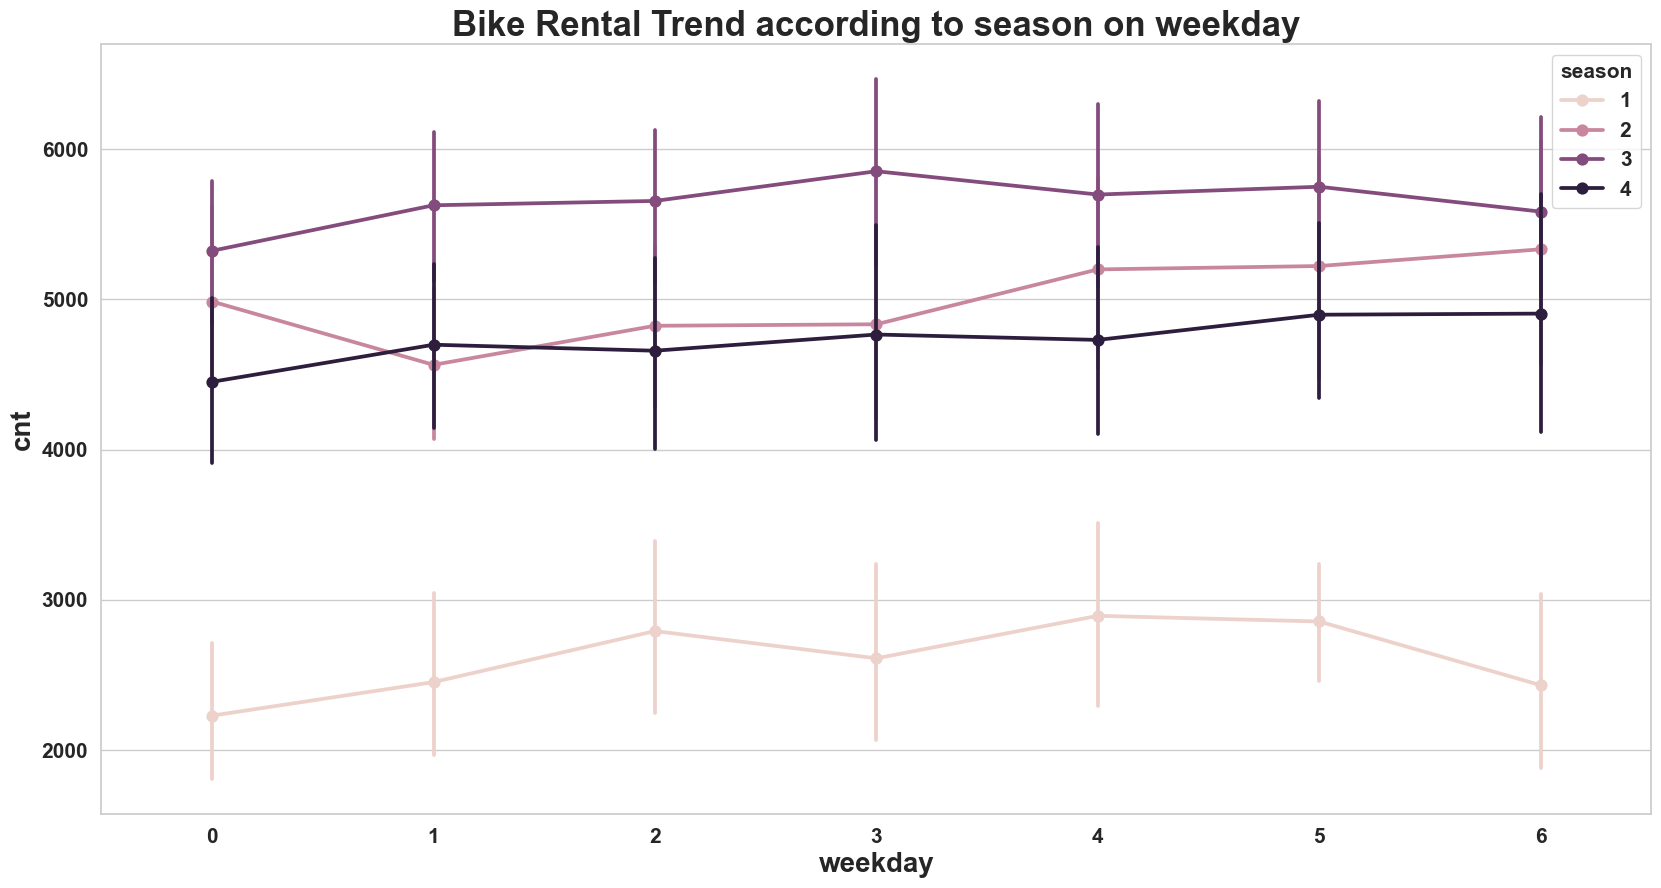

In [156]:
# Bike Rental trend with respect to Hour on Months.
plt.figure(figsize=(20,10))
sns.pointplot(x = df['weekday'],y = df['cnt'],hue = df['season'])
plt.title("Bike Rental Trend according to season on weekday")

1.Fall (3) has the highest and most stable demand , followed closely by Summer (2), which shows an increasing trend toward the weekend. 

2.Winter (4) is the most consistently used throughout the week. 

3.Spring (1) has the lowest demand and the highest daily volatility across the entire year.

## Distribution of target variable

<Axes: xlabel='cnt'>

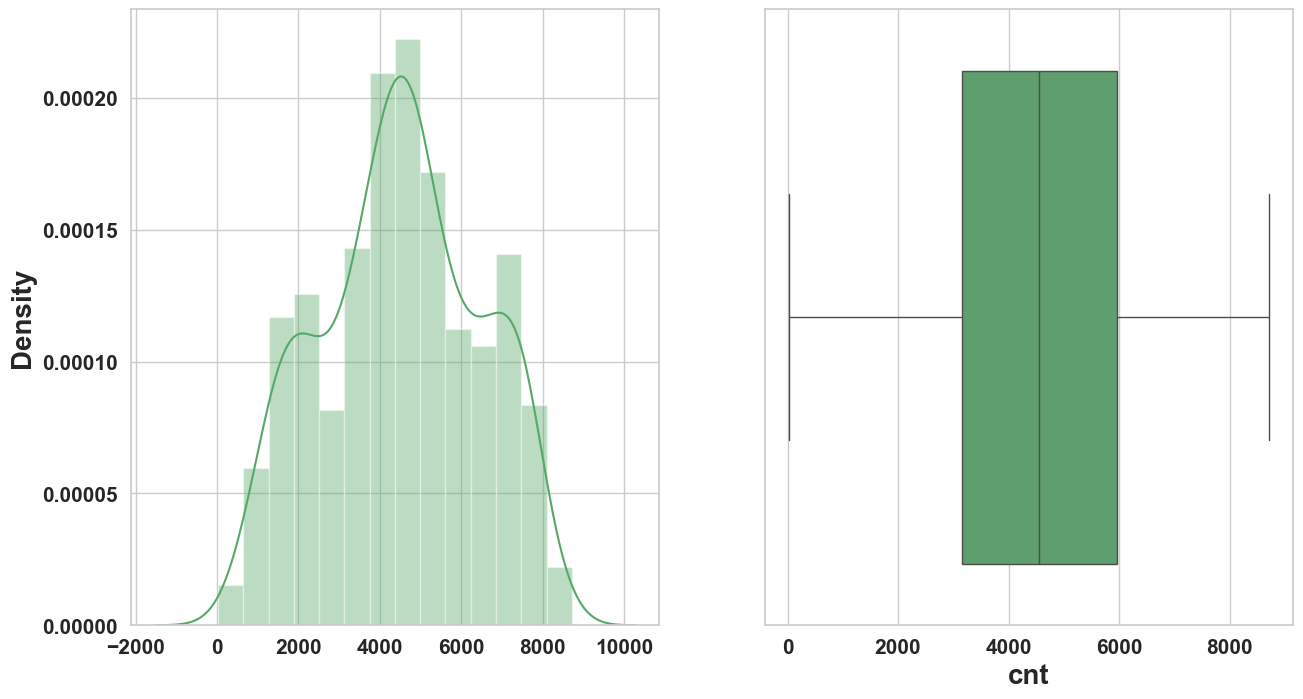

In [157]:
# Distrubution of target varible - "Rented Bike Count"
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= df['cnt'],color='g',ax=axes[0])
sns.boxplot(x = df['cnt'],color='g',ax=axes[1])

In box plot we can see that there are no outliers present

### Univariate Analysis

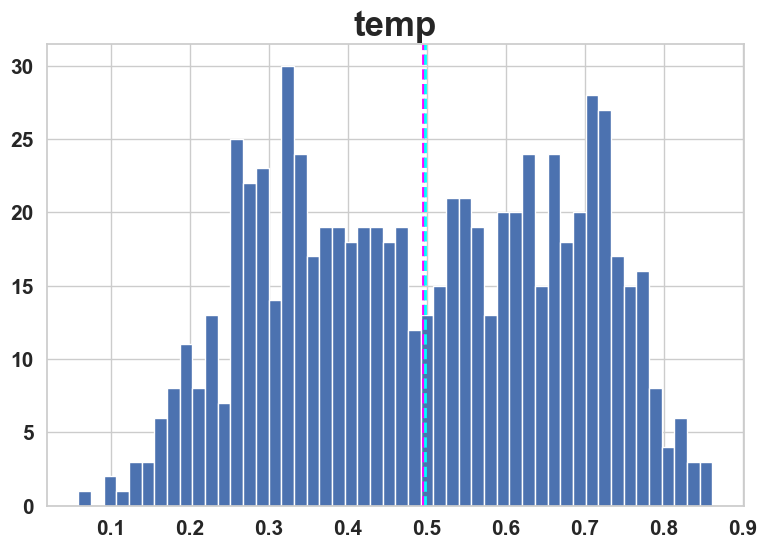

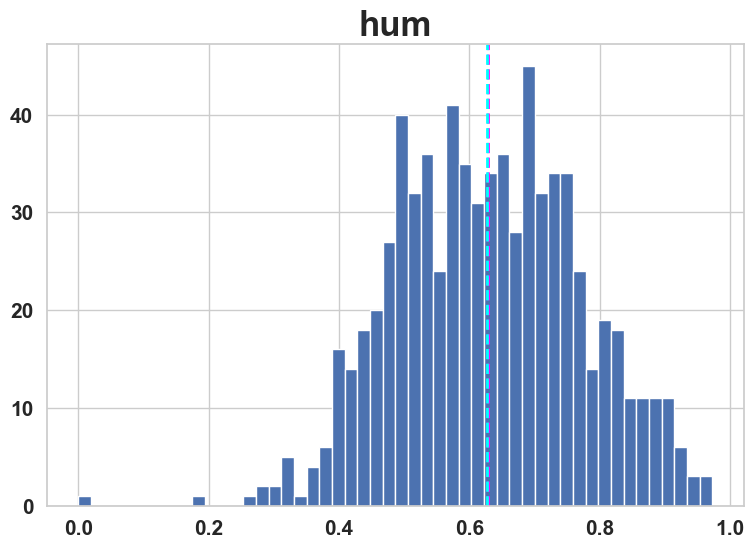

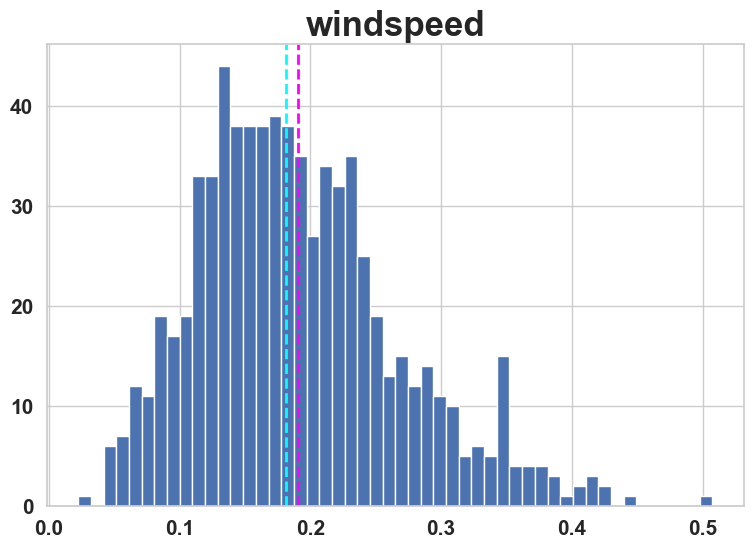

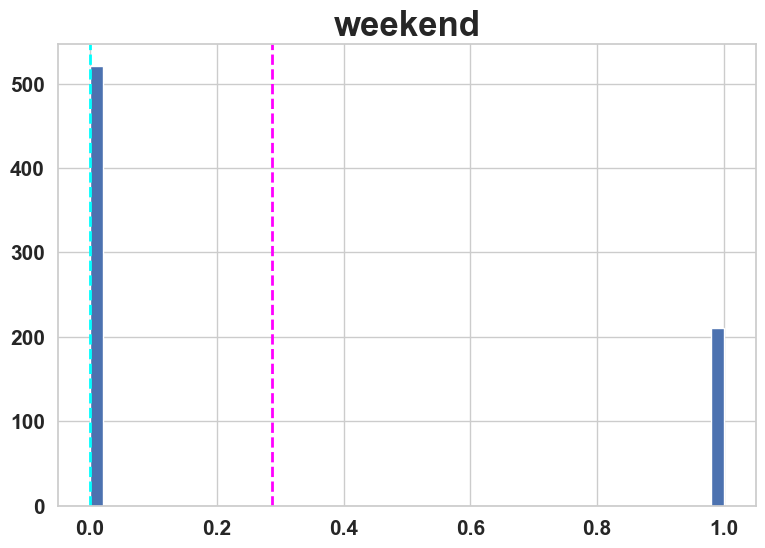

In [158]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.title(col)
plt.show()

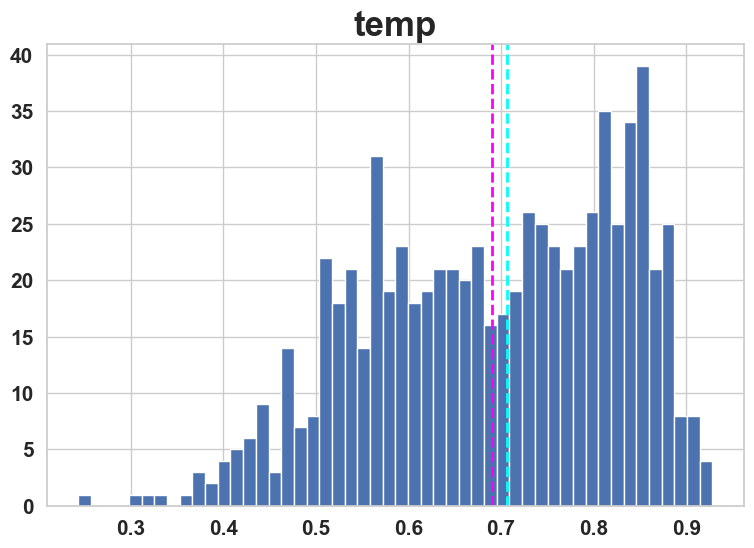

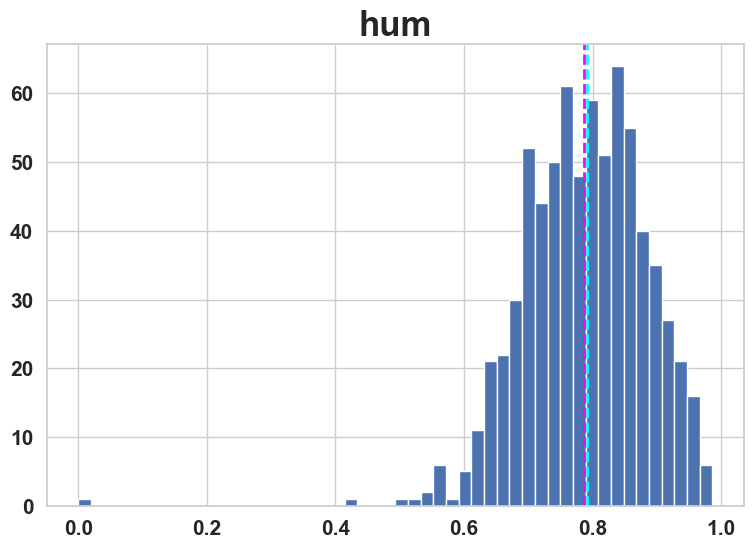

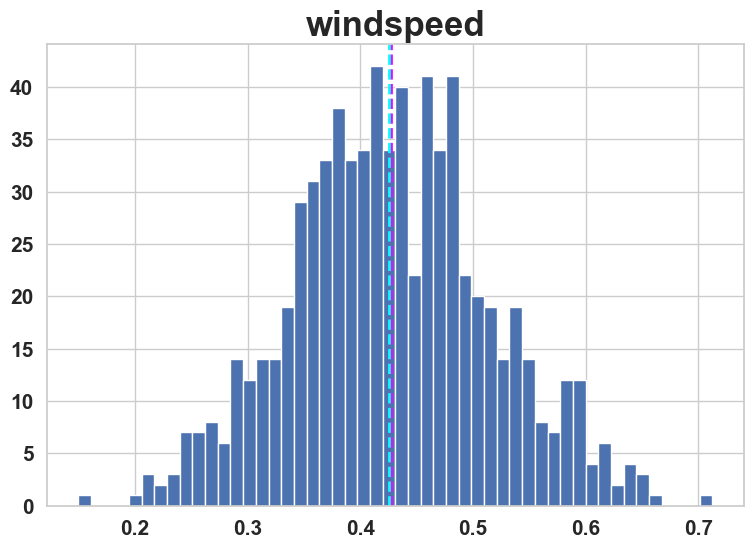

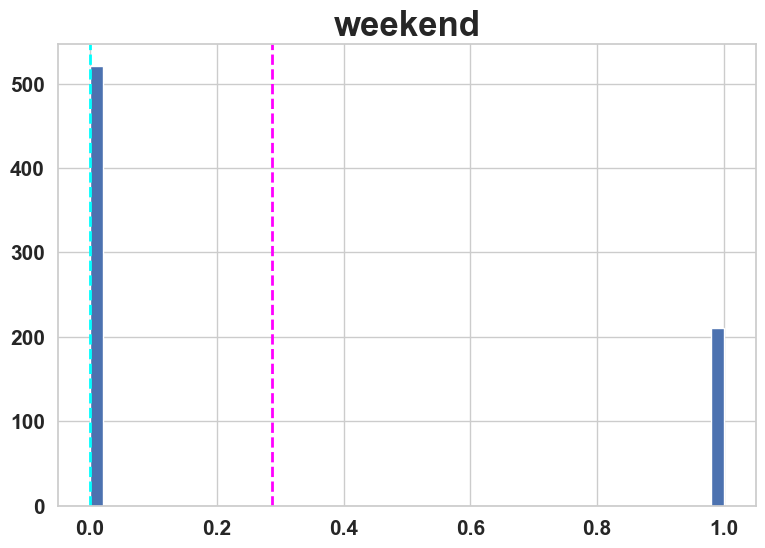

In [159]:
# Normalizing The variables using squre root method.
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

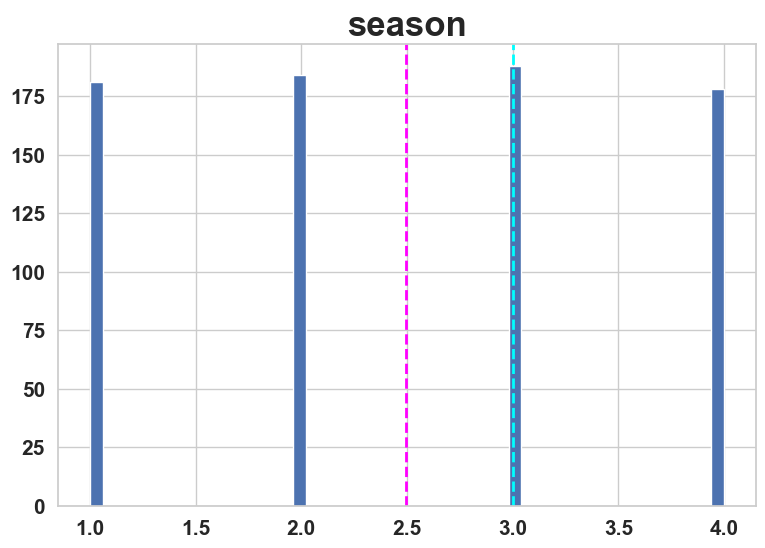

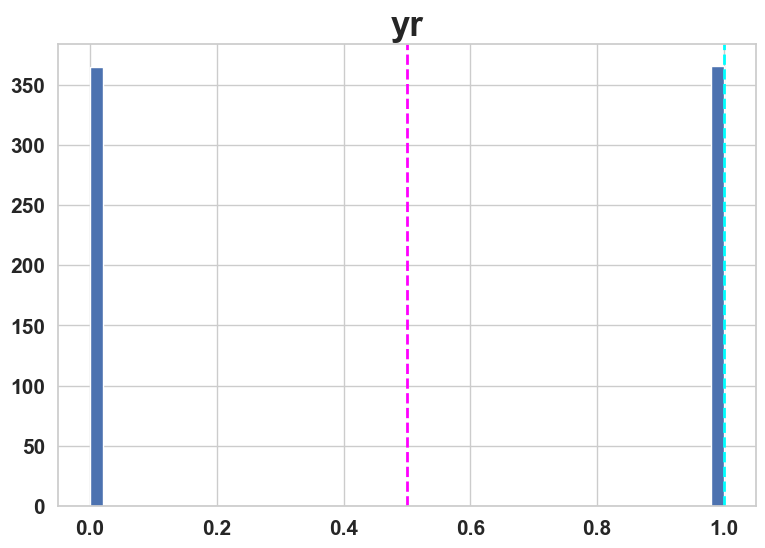

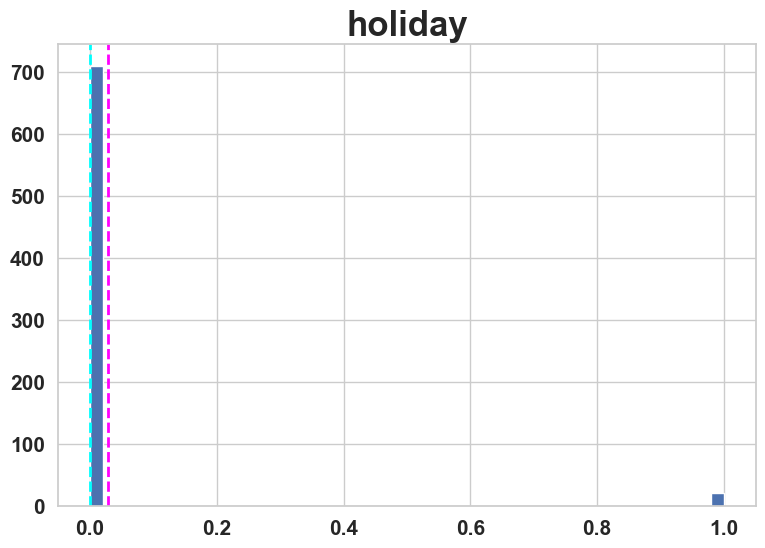

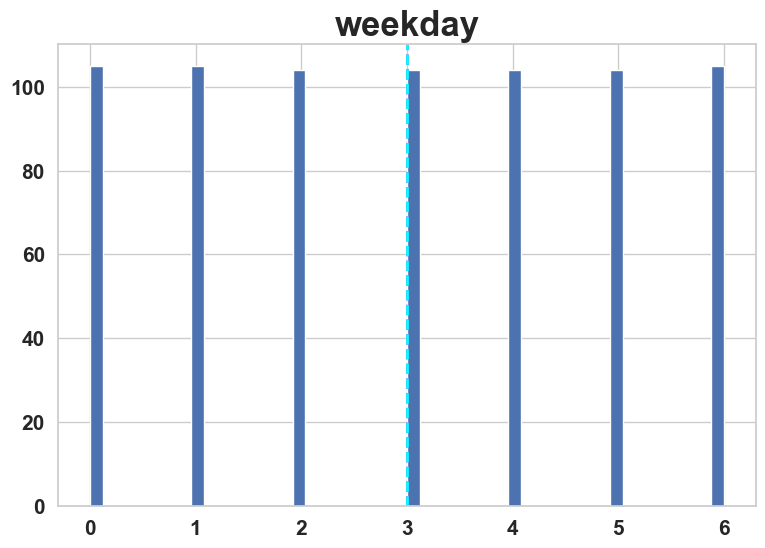

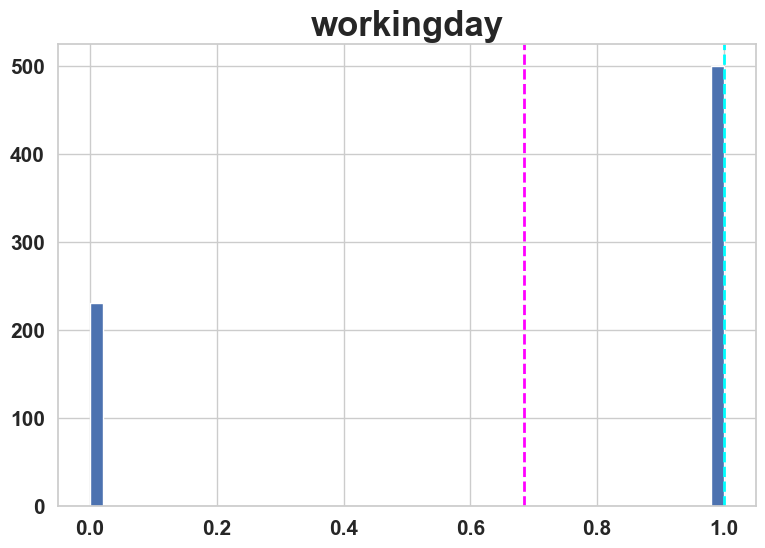

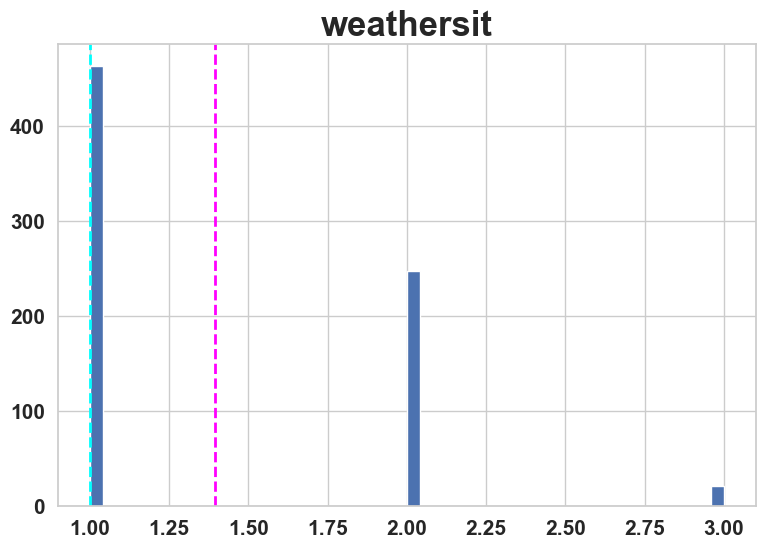

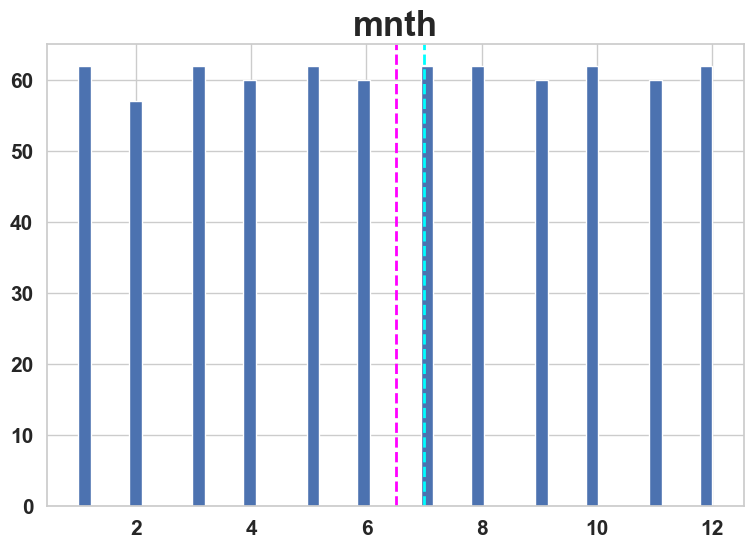

In [160]:
for col in categorical_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.title(col)
plt.show()

### Bivariate Analysis

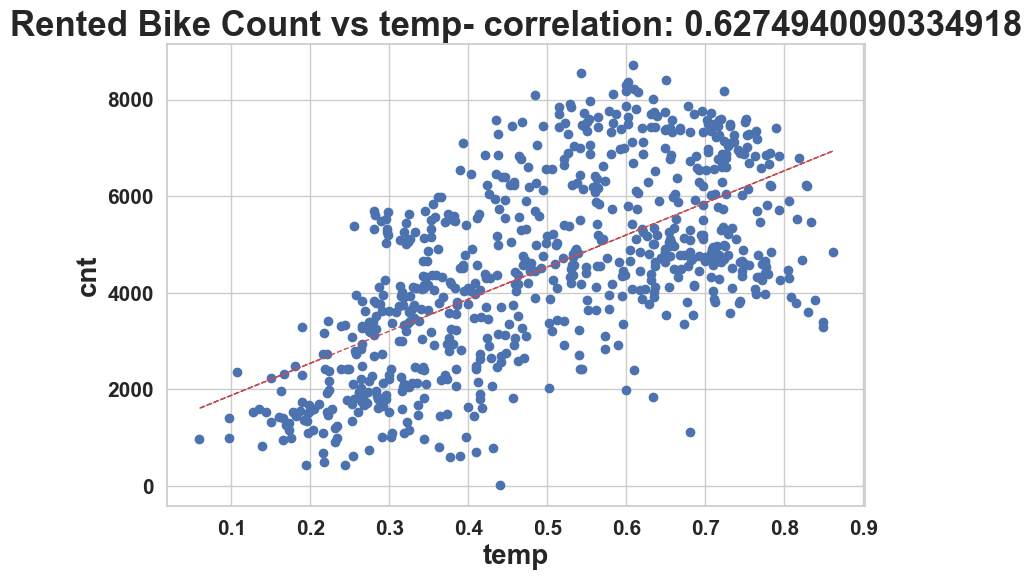

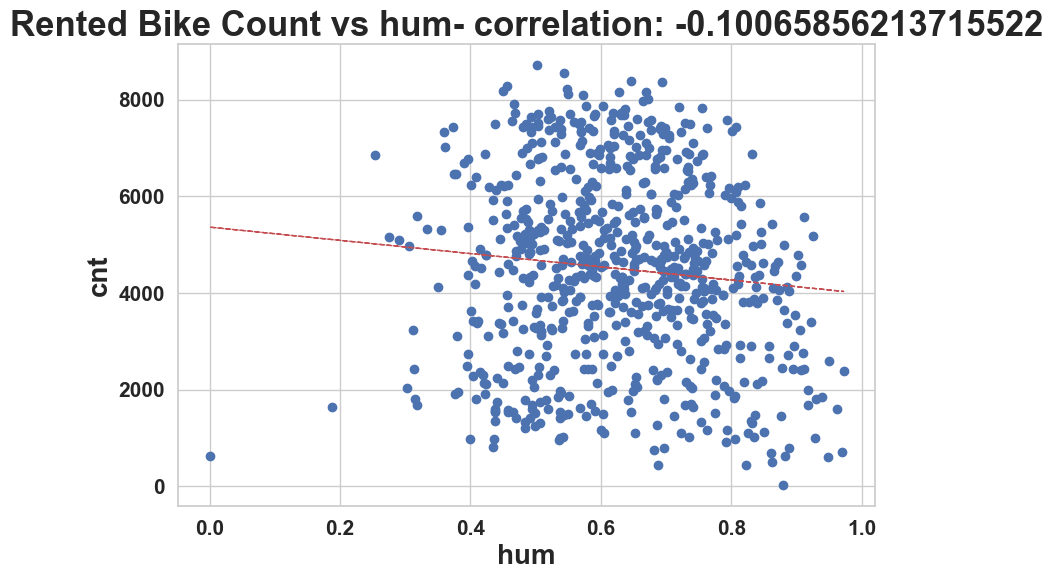

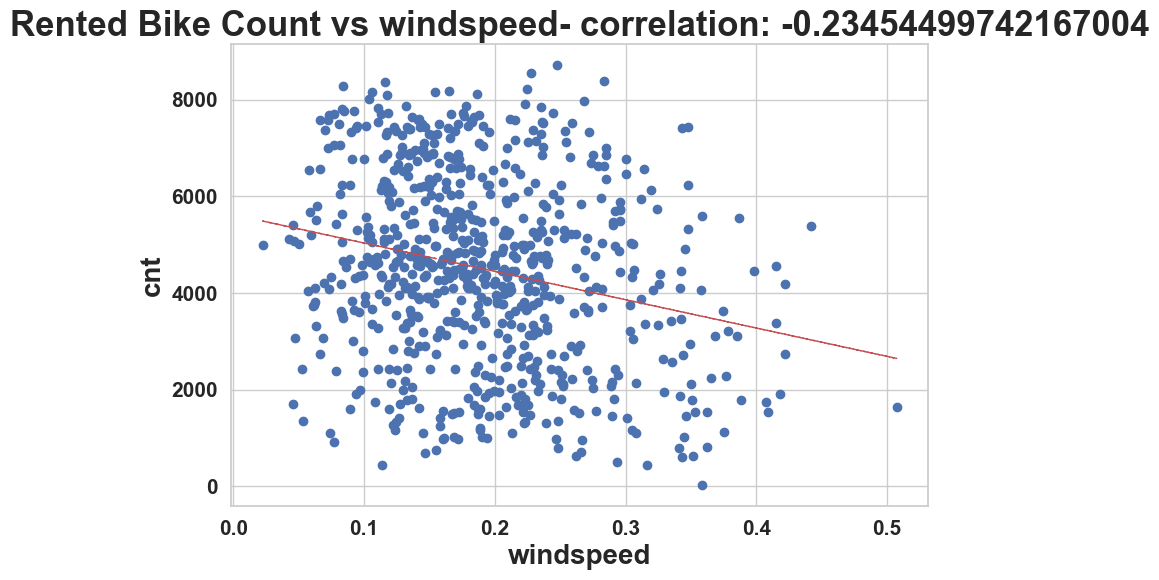

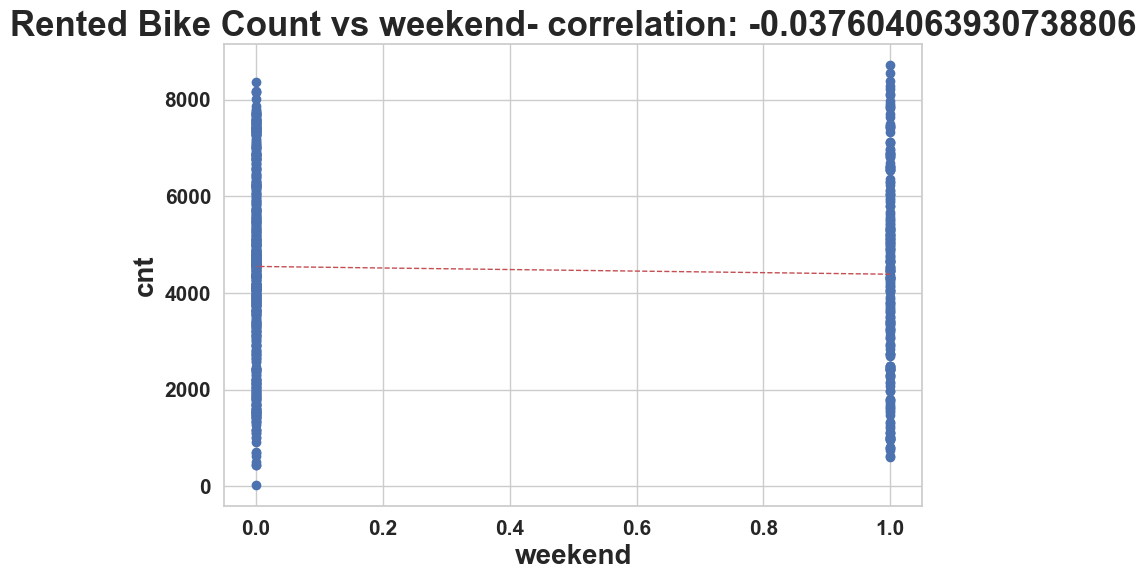

In [161]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('cnt')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['cnt'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

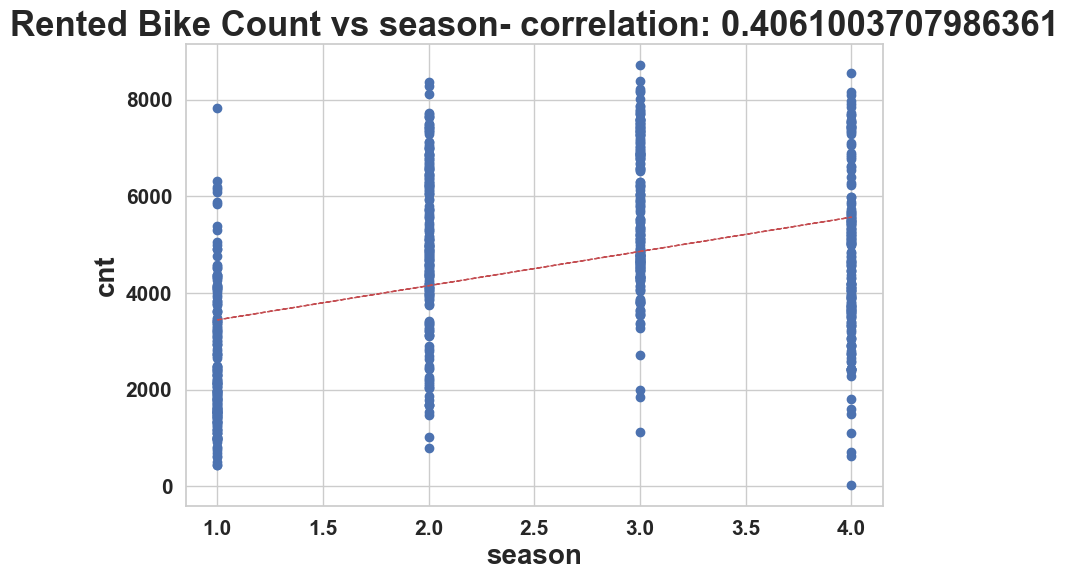

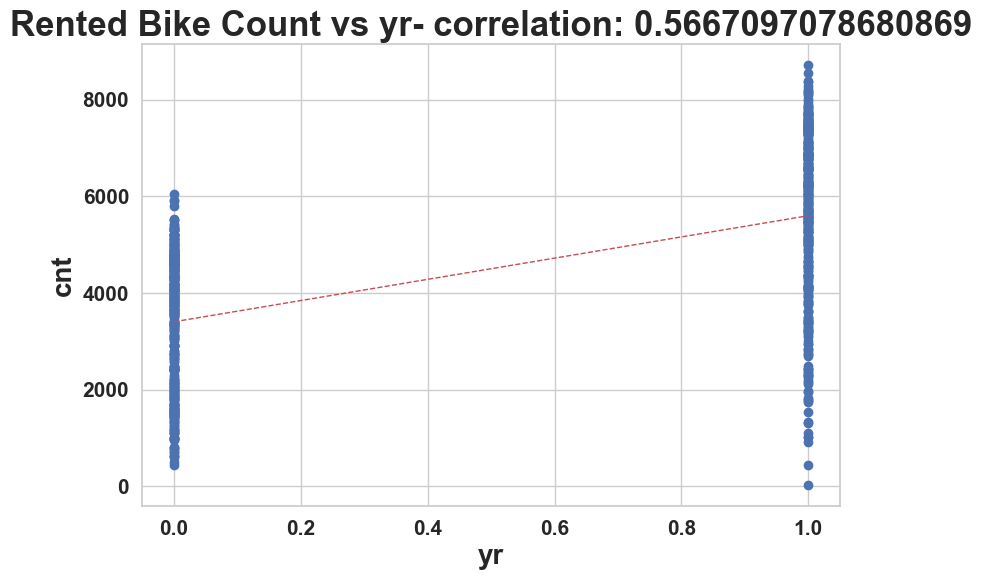

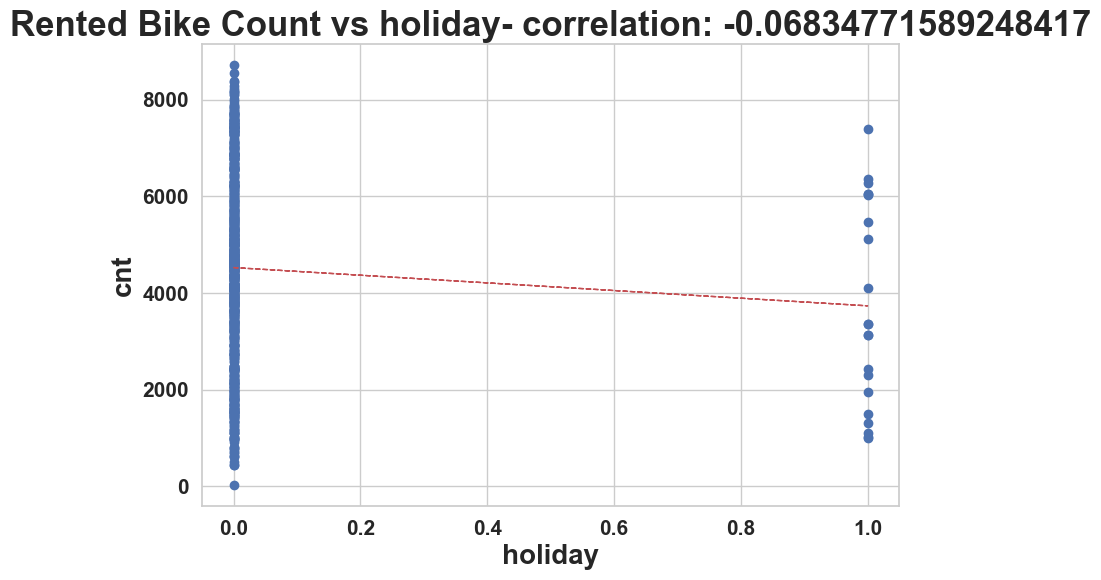

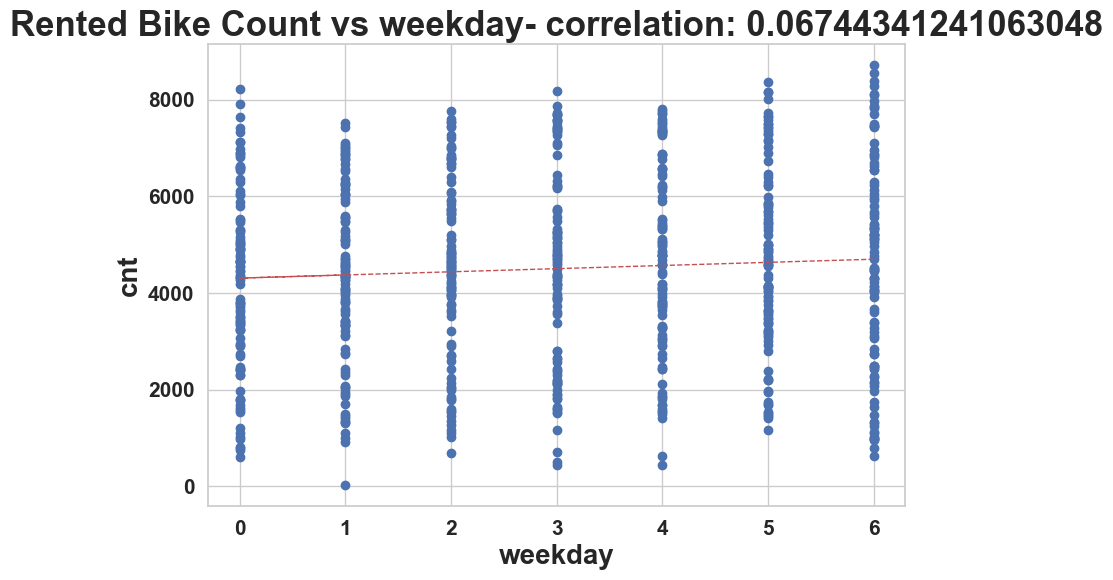

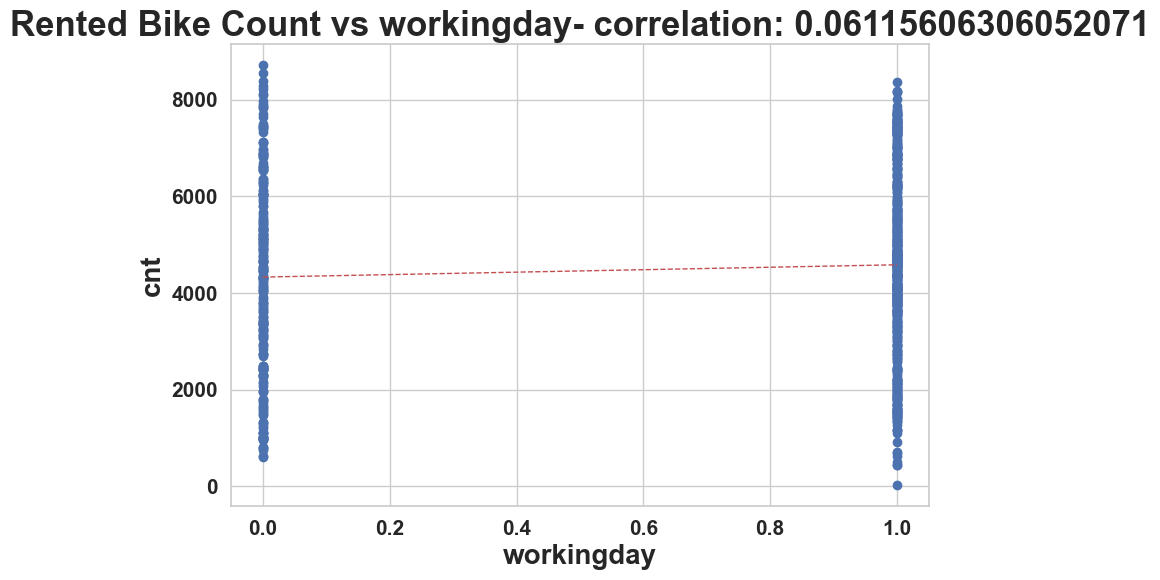

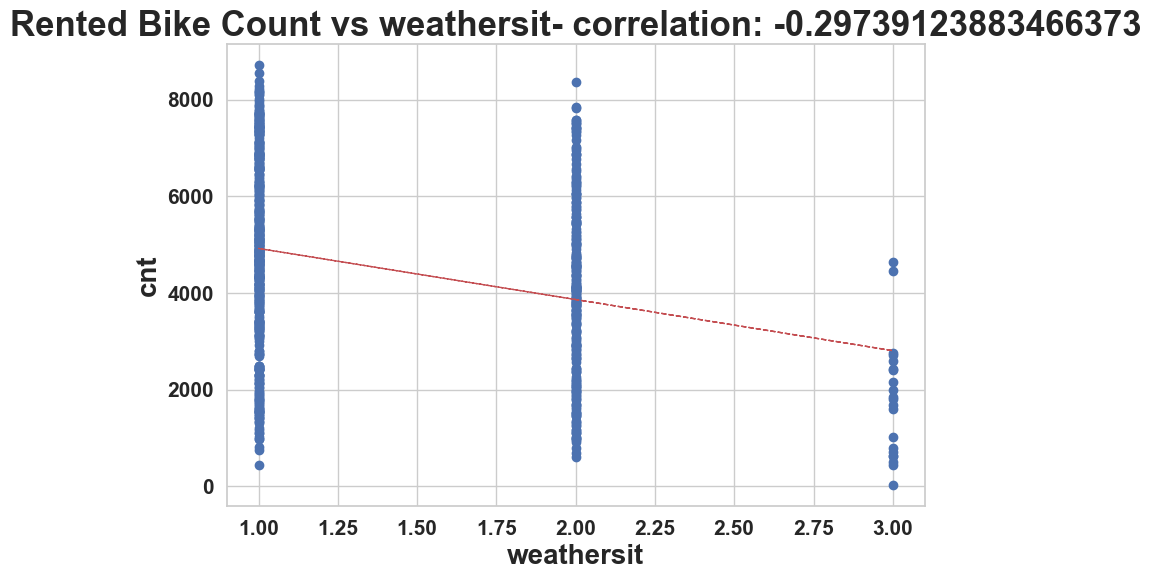

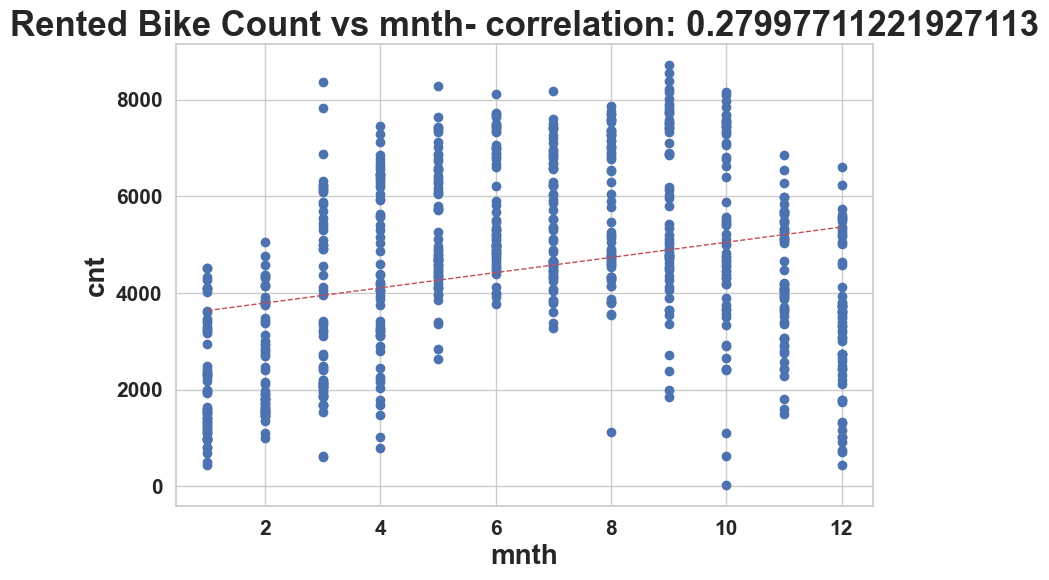

In [162]:
for col in categorical_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('cnt')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['cnt'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

<Axes: >

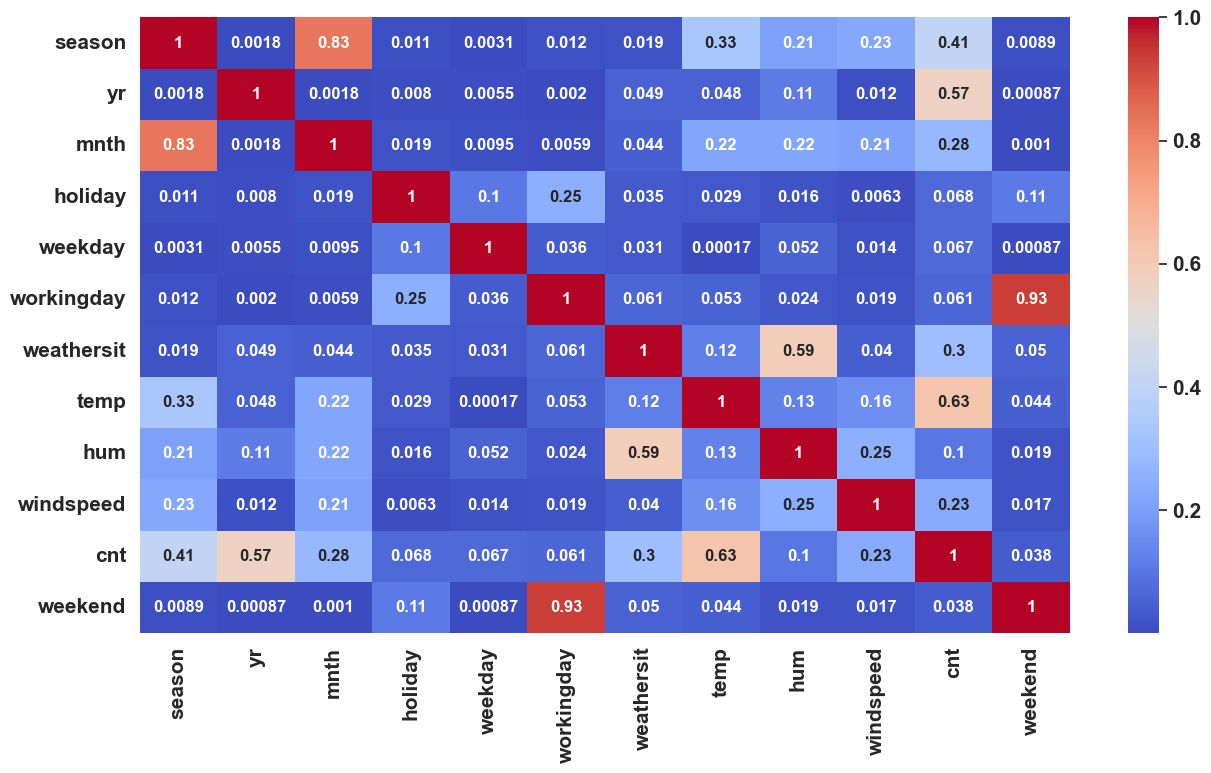

In [163]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [164]:
# Make copy of dataset
df = df.copy()

In [165]:
df.head(1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,weekend
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985,1


In [166]:
df.to_csv('C:\\Users\\User\\OneDrive\\Desktop\\INFOSYS\\Data\\EDA_DATA.csv', index=False)

### Observation

### Numeric features

1.As the temperature (or "feels like" temperature) increases, the number of bike rentals also increases significantly. People prefer to cycle in warmer weather.
2.The relationship is generally weaker. High humidity might slightly deter riders, but it's not a dominant factor like temperature.
3.The relationship is often weak or slightly negative. Very high wind speeds can deter cycling, but the overall trend across the entire range is subtle.

### Categorical features
1.Seasonal Trends (season) are strong positive correlation between the season and the rental count.

Observation: The median rental counts increase significantly from Season 1 (Spring), which typically has the lowest demand, to Season 3 (Fall/Autumn), which shows the highest median rentals and overall range.

2.The yr variable (Year) is a very strong predictor, capturing the overall increase in the popularity and adoption of the bike-sharing system.

3.Weather Condition (weathersit) is Adverse weather severely impacts bike usage.

Weather Situation 1 (Clear, few clouds) has the highest median and total rental counts.

Weather Situation 2 (Mist, cloudy) shows a moderate drop.

Weather Situation 3 (Light rain/snow) shows a drastic drop to the lowest median counts.

Weather Situation 4 (Heavy rain/snow/ice, if present) would typically show almost zero rentals, though it may be rare or absent in the daily dataset.

4.The monthly rental trend aligns with the seasonal trend, showing peak demand during mid-year months.

5.Week day trends: The monthly rental trend aligns with the seasonal trend, showing peak demand during mid-year months. It is less impactful than the weather or seasonal variables.

6.Working Day vs. Non-Working Day (workingday)
Total demand is not dramatically different between working and non-working days.

## VIF CALCULATION

In [167]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):
    '''
    Calculating VIF
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

,variables,VIF
0,season,3.541429
1,yr,1.020251
2,mnth,3.332130
3,holiday,2.284029
4,weekday,1.021463
5,workingday,33.713895
6,weathersit,1.741541
7,temp,1.215589
8,hum,1.905040
9,windspeed,1.165206


In [168]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

,variables,VIF
0,season,3.541429
1,yr,1.020251
2,mnth,3.332130
3,holiday,2.284029
4,weekday,1.021463
5,workingday,33.713895
6,weathersit,1.741541
7,temp,1.215589
8,hum,1.905040
9,windspeed,1.165206


workingday	33.7 	Too high → must drop

is_weekend	14.57	High — correlated with workingday

since workingday is the native feature , drop is_weekend ( feature added during feature engineering)

In [169]:
df = df.drop(columns=['weekend'])


In [170]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

,variables,VIF
0,season,21.112433
1,yr,1.946383
2,mnth,15.229246
3,holiday,1.099314
4,weekday,3.099564
5,workingday,3.267082
6,weathersit,13.070004
7,temp,9.498830
8,hum,25.607610
9,windspeed,5.296247


is_weekend drop definitely helped — workingday (VIF 3.15 ).

But now the time and weather features are highly correlated:

season ↔ mnth

temp ↔ hum

weathersit ↔ temp/hum

In [171]:
# Checking categoiries in season column.
df['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [172]:
season_dummies = pd.get_dummies(df['season'], prefix='season', drop_first=True)
df = pd.concat([df, season_dummies], axis=1)
df = df.drop(columns=['season','hum'])


In [173]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

,variables,VIF
0,yr,1.946053
1,mnth,4.573376
2,holiday,1.092664
3,weekday,3.085268
4,workingday,3.221616
5,weathersit,6.123932
6,temp,6.701484
7,windspeed,5.251681


The time features (yr, mnth) -fine 

The categorical features (holiday, weekday, workingday) -fine

The weather block (weathersit, temp, windspeed) still carries mild-to-heavy correlation — but acceptable, this is expected and normal for the Bike Sharing dataset.

In [174]:
#standardise continuous features

from sklearn.preprocessing import StandardScaler

num_cols = ['temp', 'windspeed', 'yr']  # numeric columns in final features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


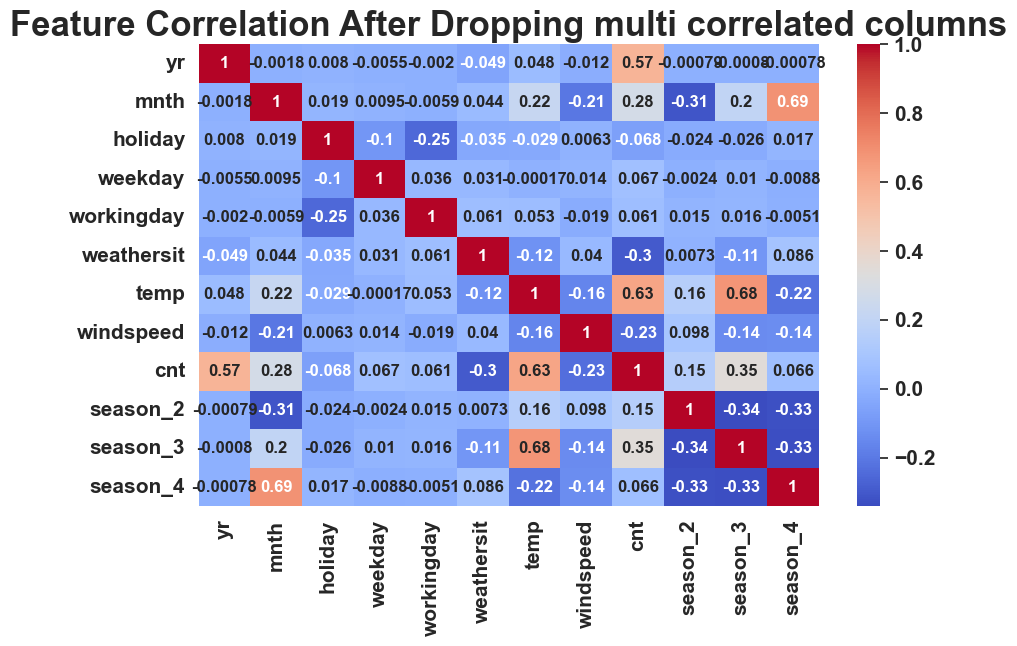

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation After Dropping multi correlated columns")
plt.show()


In [176]:
# Checking categoiries in holiday columns.
df['holiday'].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [177]:
# Checking categoiries in Functioning Day columns.
df['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [178]:
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,windspeed,cnt,season_2,season_3,season_4
0,-1.001369,1,0,6,0,2,-0.826662,-0.387892,985,False,False,False
1,-1.001369,1,0,0,0,2,-0.721095,0.749602,801,False,False,False
2,-1.001369,1,0,1,1,1,-1.634657,0.746632,1349,False,False,False
3,-1.001369,1,0,2,1,1,-1.614780,-0.389829,1562,False,False,False
4,-1.001369,1,0,3,1,1,-1.467414,-0.046307,1600,False,False,False


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          731 non-null    float64
 1   mnth        731 non-null    int64  
 2   holiday     731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   windspeed   731 non-null    float64
 8   cnt         731 non-null    int64  
 9   season_2    731 non-null    bool   
 10  season_3    731 non-null    bool   
 11  season_4    731 non-null    bool   
dtypes: bool(3), float64(3), int64(6)
memory usage: 53.7 KB


In [180]:
df.to_csv('C:\\Users\\User\\OneDrive\\Desktop\\INFOSYS\\Data\\EDA_WITH_VIF_DATA.csv', index=False)